In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt


fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [ ]:
train_images = train_images.reshape(60000,784)
test_images = test_images.reshape(10000,784)

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# 정규화한다
scaler = MinMaxScaler()
scaler.fit(train_images)
train_images = scaler.transform(train_images)
scaler.fit(test_images)
test_images = scaler.transform(test_images)

# 표준화한다.
scaler = StandardScaler()
scaler.fit(train_images)
train_images = scaler.transform(train_images)
scaler.fit(test_images)
test_images = scaler.transform(test_images)
#train_images, test_images = train_images / 255, test_images / 255
# 순차 심층 신경망 모델을 만들자
model = keras.models.Sequential( [
   keras.layers.Input(shape=(784,)),  # 입력층 수정
   keras.layers.Dropout(0.2),
   keras.layers.Dense(128, activation= 'relu'),
   keras.layers.Dense(128, activation= 'relu'),
   keras.layers.Dense(64, activation= 'relu'),  # 은닉층 2개->3개, 노드 수 변경
   keras.layers.Dense(10, activation= 'softmax'),
   ])

In [ ]:
import time as t
start = t.time()
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
history = model.fit(train_images, train_labels, batch_size=64,
                    epochs=29, validation_split=0.25)
print(t.time() - start)

Epoch 1/29
352/352 [==============================] - 3s 8ms/step - loss: 0.6387 - accuracy: 0.7711 - val_loss: 0.4146 - val_accuracy: 0.8454
Epoch 2/29
352/352 [==============================] - 3s 8ms/step - loss: 0.4565 - accuracy: 0.8336 - val_loss: 0.3744 - val_accuracy: 0.8610
Epoch 3/29
352/352 [==============================] - 3s 7ms/step - loss: 0.4184 - accuracy: 0.8467 - val_loss: 0.3567 - val_accuracy: 0.8702
Epoch 4/29
352/352 [==============================] - 3s 7ms/step - loss: 0.3938 - accuracy: 0.8552 - val_loss: 0.3491 - val_accuracy: 0.8730
Epoch 5/29
352/352 [==============================] - 3s 7ms/step - loss: 0.3745 - accuracy: 0.8624 - val_loss: 0.3390 - val_accuracy: 0.8775
Epoch 6/29
352/352 [==============================] - 3s 7ms/step - loss: 0.3669 - accuracy: 0.8639 - val_loss: 0.3496 - val_accuracy: 0.8724
Epoch 7/29
352/352 [==============================] - 3s 7ms/step - loss: 0.3557 - accuracy: 0.8699 - val_loss: 0.3353 - val_accuracy: 0.8761
Epoch 

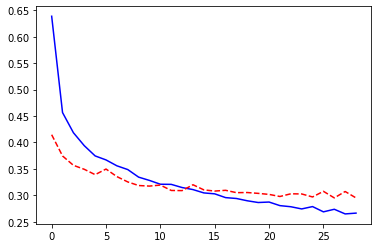

In [ ]:
plt.plot(history.history['loss'], 'b-')
plt.plot(history.history['val_loss'], 'r--')

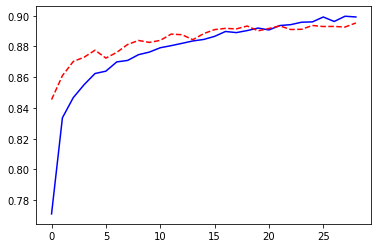

In [ ]:
plt.plot(history.history['accuracy'], 'b-')
plt.plot(history.history['val_accuracy'], 'r--')

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('테스트 정확도:', test_acc)

313/313 - 0s - loss: 0.3158 - accuracy: 0.8892
테스트 정확도: 0.88919997215271


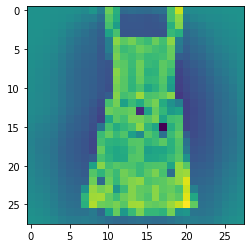

In [ ]:
test_images = test_images.reshape(10000, 28, 28)
randIdx = np.random.randint(0, 1000)
plt.imshow(test_images[randIdx])

In [ ]:
print(test_images[randIdx].shape)
new_image = test_images[randIdx][np.newaxis, :, :]

print(new_image.shape)

yhat = model.predict(new_image)
print(yhat.round(3))    # 소수점 아래 세 자리 정확도로 살펴보자

(28, 28)
(1, 28, 28)


ValueError: ignored

In [ ]:
yhat = np.argmax( model.predict( test_images[randIdx][np.newaxis, :, :]) )
yhat

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
              'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
print(class_names[yhat])

In [ ]:
def plot_images(images, labels, images_per_row=5):
  n_images = len(images)
  n_rows = (n_images-1) // images_per_row + 1
  fig, ax = plt.subplots(n_rows, images_per_row, 
                         figsize = (images_per_row * 2, n_rows * 2))
  for i in range(n_rows):
      for j in range(images_per_row):
          if i*images_per_row + j >= n_images: break
          img_idx = i*images_per_row + j
          a_image = images[img_idx].reshape(28,28)
          if n_rows>1: axis = ax[i, j]
          else: axis = ax[j]
          axis.get_xaxis().set_visible(False)
          axis.get_yaxis().set_visible(False)
          label = class_names[labels[img_idx]]
          axis.set_title(label)
          axis.imshow(a_image, interpolation='nearest')

In [ ]:
images = test_images[:25]
predictions = np.argmax(model.predict(images), axis=1)
print(predictions)
plot_images(images, predictions, images_per_row = 5)